## Task1

In [ ]:
import random

a=[]

while(True):
    k = ''.join(random.sample('01234', 5))
    if k not in a:
        a.append(k)
    else:
        print(len(a))
    

Ans: 
(C) The digit 2 appears in some position before the digit 3.


## code

a1=[]
for i in a:
    if (int(i[1]) == (int(i[0])*2)) and (i[2] < i[4]):
        a1.append(i)
        
len(a1)


How many unique codes is it possible to create in accordance with the rules?

Ans: 6    

## Task2 

The corrected query is as below

In [ ]:
WITH daily_data AS (
SELECT
t1.game,
t1.player_segment,
date_diff(first_purchase_date, event_date, day) AS days_since_conversion ,
COUNT ( 1 ) AS players
FROM profile t1
LEFT JOIN daily ON t2.player_id = t1.player_id
WHERE first_purchase_date IS NOT NULL
AND date_diff(first_purchase_date, event_date, day) >= 0
GROUP BY 1 , 2, 3)

SELECT
* ,
ROUND ( players * 1.0 / MAX ( players ) OVER ( PARTITION BY player_segment ) , 3 ) AS
retention
FROM daily_data

## Task 3

In [1]:
import os
import shutil
import gzip
import pandas as pd

filenamesDA = os.listdir("data/daily_activity")

dfDailyActivity =  pd.read_csv("data/daily_activity/"+filenamesDA[0], compression='gzip', sep='|', header=None)

for file in filenamesDA[1:]:
    df = pd.read_csv("data/daily_activity/"+file, compression='gzip', sep='|', header=None)
    dfDailyActivity=dfDailyActivity.append(df, ignore_index=True)
    
    
filenamesPro = os.listdir("data/profile")

dfProfile =  pd.read_csv("data/profile/"+filenamesPro[0], compression='gzip', sep='|', header=None)

for file in filenamesPro[1:]:
    df = pd.read_csv("data/profile/"+file, compression='gzip', sep='|', header=None)
    dfProfile=dfProfile.append(df, ignore_index=True)
    
dfDailyActivity.columns=['player_id', 'event_date','num_purchases', 'game']
dfProfile.columns=['player_id', 'country_isocode2', 'registration_date', 'operating_system', 'game']

In [2]:
print(dfDailyActivity.shape)
print(dfProfile.shape)

(451123, 4)
(90286, 5)


In [3]:
dfDailyActivity['event_date'].nunique()

109

In [4]:
dfDailyActivity["player_id"] = dfDailyActivity["player_id"].astype(int)
dfDailyActivity["event_date"] = dfDailyActivity["event_date"].astype('datetime64[D]')
dfDailyActivity["num_purchases"] = dfDailyActivity["num_purchases"].astype(int)
dfDailyActivity["game"] = dfDailyActivity["game"].astype(str)

In [5]:
dfDailyActivity['event_date'].nunique()

109

In [6]:
dfProfile["registration_date"].nunique()

57

In [7]:
dfProfile["player_id"] = dfProfile["player_id"].astype(int)
dfProfile["country_isocode2"] = dfProfile["country_isocode2"].astype(str)
dfProfile["registration_date"] = dfProfile["registration_date"].astype('datetime64[D]')
dfProfile["operating_system"] = dfProfile["operating_system"].astype(str)
dfProfile["game"] = dfProfile["game"].astype(str)

In [8]:
dfProfile['registration_date'].nunique()

57

## converting dfProfile & dfDailyActivity into spark dataframes

In [9]:
import findspark
findspark.init()
import pyspark

In [10]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
import pyspark.sql.functions as sqlfunc
from pyspark.sql.types import *
import argparse, sys
from pyspark.sql import *
import pandas as pd

from pyspark.sql import SQLContext

In [11]:
spark = SparkSession.builder.appName('pandasToSparkDF').getOrCreate()

schemaDA = StructType([ StructField("player_id", IntegerType(), True)\
                       ,StructField("event_date", DateType(), True)\
                       ,StructField("num_purchases", IntegerType(), True)\
                       ,StructField("game", StringType(), True)
                       ])
schemaDA

StructType(List(StructField(player_id,IntegerType,true),StructField(event_date,DateType,true),StructField(num_purchases,IntegerType,true),StructField(game,StringType,true)))

In [12]:
dfDA = spark.createDataFrame(dfDailyActivity, schemaDA)

In [13]:
dfDA.show()

+---------+----------+-------------+-----+
|player_id|event_date|num_purchases| game|
+---------+----------+-------------+-----+
|115322121|2019-02-13|            0|game2|
|115346943|2019-02-13|            0|game2|
|115357941|2019-02-13|            0|game2|
|115361044|2019-02-13|            0|game2|
|115330832|2019-02-13|            0|game2|
|115358080|2019-02-13|            0|game2|
|115354682|2019-02-13|            0|game2|
|115359804|2019-02-13|            0|game2|
|115339114|2019-02-13|            0|game2|
|115357683|2019-02-13|            0|game2|
|115356136|2019-02-13|            0|game2|
|115355058|2019-02-13|            0|game2|
|115358430|2019-02-13|            0|game2|
|115342610|2019-02-13|            0|game2|
|115356011|2019-02-13|            0|game2|
|115356155|2019-02-13|            0|game2|
|115359952|2019-02-13|            0|game2|
|115356191|2019-02-13|            0|game2|
|115361093|2019-02-13|            0|game2|
|115360439|2019-02-13|            0|game2|
+---------+

In [14]:
# spark2 = SparkSession.builder.appName('pandasToSparkDF2').getOrCreate()

schemaPro = StructType([ StructField("player_id", IntegerType(), True)\
                       ,StructField("country_isocode2", StringType(), True)\
                       ,StructField("registration_date",  DateType(), True)\
                       ,StructField("operating_system", StringType(), True)\
                       ,StructField("game", StringType(), True)
                       ])

dfPro = spark.createDataFrame(dfProfile,schemaPro)

In [15]:
dfPro.show()

+---------+----------------+-----------------+----------------+-----+
|player_id|country_isocode2|registration_date|operating_system| game|
+---------+----------------+-----------------+----------------+-----+
|491460239|              US|       2019-03-23|             iOS|game1|
|485143893|              RU|       2019-02-17|             iOS|game1|
|486693600|              JO|       2019-03-01|         Android|game1|
|485646580|              FI|       2019-02-21|             iOS|game1|
|492626012|              AT|       2019-04-02|             iOS|game1|
|490538066|              GB|       2019-03-15|         Android|game1|
|491391993|              CN|       2019-03-23|             iOS|game1|
|491708187|              DE|       2019-03-25|             iOS|game1|
|489370723|              IE|       2019-03-07|             iOS|game1|
|490143493|              DK|       2019-03-12|             iOS|game1|
|492845630|              VN|       2019-04-04|         Android|game1|
|484663464|         

## SQL statements must be run against a table. Creating a table that's a pointer to the DataFrame

In [16]:
dfPro.registerTempTable("ProfileTable")
dfDA.registerTempTable("DailyActivityTable")

## Query to generate the required table

In [17]:
queryfinal= """

WITH table0 as 

(select t1.player_id,t1.event_date, t1.num_purchases, t1.game,
t2.country_isocode2, t2.registration_date, t2.operating_system

from DailyActivityTable t1
left join ProfileTable t2
ON t1.player_id=t2.player_id and
t1.game=t2.game
)
, dnu as (

select
registration_date, country_isocode2, game, operating_system,
count(distinct player_id) as tot_dnu
from table0
group by registration_date, country_isocode2, game, operating_system
)
,dau as (

select 
event_date, country_isocode2, game, operating_system,
SUM(num_purchases) as tot_purchases, count(distinct player_id) as tot_dau 
from table0
group by event_date, country_isocode2, game, operating_system
)

, d1_retention as (

select COUNT( distinct player_id) *100/ MAX(dnu.tot_dnu)  as d1_count_percent, table0.registration_date, table0.country_isocode2, table0.game, table0.operating_system
from table0,dnu
where datediff(event_date, table0.registration_date)>=1
and table0.registration_date= dnu.registration_date
and table0.country_isocode2 = dnu.country_isocode2
and table0.game  = dnu.game 
and table0.operating_system = dnu.operating_system
group by table0.registration_date, table0.country_isocode2, table0.game, table0.operating_system

)
, d7_retention as (

select COUNT( distinct player_id) * 100/ MAX(dnu.tot_dnu)  as d7_count_percent, table0.registration_date, table0.country_isocode2, table0.game, table0.operating_system
from table0,dnu
where datediff(event_date, table0.registration_date)>=7
and table0.registration_date= dnu.registration_date
and table0.country_isocode2 = dnu.country_isocode2
and table0.game  = dnu.game 
and table0.operating_system = dnu.operating_system
group by table0.registration_date, table0.country_isocode2, table0.game, table0.operating_system
)

,appdau_ as (

select 
event_date, country_isocode2, game, operating_system,
SUM(num_purchases) /count(distinct player_id) as appdau 
from table0
group by event_date, country_isocode2, game, operating_system

)

, combine as(
 select dnu.registration_date,dnu.country_isocode2, dnu.game, dnu.operating_system, dnu.tot_dnu,
 dau.event_date, dau.tot_purchases, dau.tot_dau, d1_retention.d1_count_percent,d7_retention.d7_count_percent, appdau_.appdau
 from dnu
 
 inner join dau on dnu.country_isocode2=dau.country_isocode2 and
 dnu.game=dau.game and 
 dnu.operating_system= dau.operating_system and dnu.registration_date=dau.event_date 
 
 inner join d1_retention on dnu.country_isocode2=d1_retention.country_isocode2 and
 dnu.game=d1_retention.game and 
 dnu.operating_system= d1_retention.operating_system and dnu.registration_date=d1_retention.registration_date 
 
 inner join d7_retention on dnu.country_isocode2=d7_retention.country_isocode2 and
 dnu.game=d7_retention.game and 
 dnu.operating_system= d7_retention.operating_system and dnu.registration_date=d7_retention.registration_date 
 
 inner join appdau_ on dnu.country_isocode2=appdau_.country_isocode2 and
 dnu.game=appdau_.game and 
 dnu.operating_system= appdau_.operating_system and dnu.registration_date=appdau_.event_date 
 
)
select * from combine 


"""

dffinal = spark.sql(queryfinal)
dffinal.show()

+-----------------+----------------+-----+----------------+-------+----------+-------------+-------+------------------+------------------+--------------------+
|registration_date|country_isocode2| game|operating_system|tot_dnu|event_date|tot_purchases|tot_dau|  d1_count_percent|  d7_count_percent|              appdau|
+-----------------+----------------+-----+----------------+-------+----------+-------------+-------+------------------+------------------+--------------------+
|       2019-02-11|              IL|game1|             iOS|     13|2019-02-11|            0|     13|7.6923076923076925|7.6923076923076925|                 0.0|
|       2019-02-12|              LB|game1|         Android|      1|2019-02-12|            0|      1|             100.0|             100.0|                 0.0|
|       2019-02-13|              PE|game2|         Android|      3|2019-02-13|            0|      3| 66.66666666666667| 66.66666666666667|                 0.0|
|       2019-02-14|              RU|game

In [18]:
df_plot = dffinal.toPandas()

In [96]:
df_plot.head()

,registration_date,country_isocode2,game,operating_system,tot_dnu,event_date,tot_purchases,tot_dau,d1_count_percent,d7_count_percent,appdau
0,2019-02-11,IL,game1,iOS,13,2019-02-11,0,13,7.692308,7.692308,0.0
1,2019-02-12,LB,game1,Android,1,2019-02-12,0,1,100.000000,100.000000,0.0
2,2019-02-13,PE,game2,Android,3,2019-02-13,0,3,66.666667,66.666667,0.0
3,2019-02-14,RU,game1,iOS,28,2019-02-14,0,45,53.571429,35.714286,0.0
4,2019-02-16,PH,game1,iOS,2,2019-02-16,0,7,100.000000,100.000000,0.0


## Task 5

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df_ios=df_plot[df_plot['operating_system']=='iOS']
df_And=df_plot[df_plot['operating_system']=='Android']
df_G1=df_plot[df_plot['game']=='game1']
df_G2=df_plot[df_plot['game']=='game2']

As we can see we have made 4 different dataframes from the main dataframe df_plot. 

- **df_ios** is the dataframe containing data with only IOS operating system
- **df_And** is the dataframe containing data with only Android operating system
- **df_G1**  is the dataframe containing data with only game1 as the game option
- **df_G2**  is the dataframe containing data with only game2 as the game option

We can see that Game1 in IOS operating system did better than Game2 in Android operating system. 

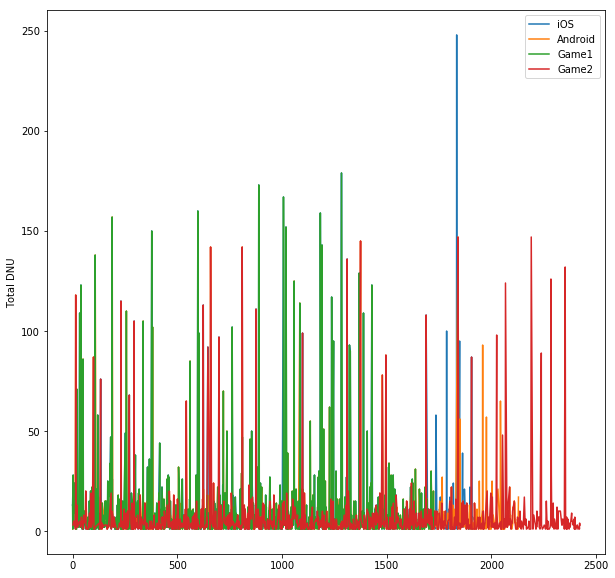

In [106]:
plt.figure(figsize=(10,10))
plt.plot(df_ios['tot_dnu'][0:1000],label='iOS')
plt.plot(df_And['tot_dnu'][0:1000],label='Android')
plt.plot(df_G1['tot_dnu'][0:1000],label='Game1')
plt.plot(df_G2['tot_dnu'][0:1000],label='Game2')
plt.ylabel('Total DNU')
plt.legend()
plt.savefig('Compare.png',dpi=600)

- We now check *total_dau* with respect to the games. 
- The first plot is for game 1 and the second plot is for game 2
- We see that game1 did pretty well with higher *tot_dau* than game2

In [107]:
# plt.figure(figsize=(10,10))
# plt.plot(df_G1['tot_dnu'],label='Game1')
# plt.plot(df_G2['tot_dnu'],label='Game2')
# plt.legend()
# plt.savefig('Compare3.png',dpi=600)

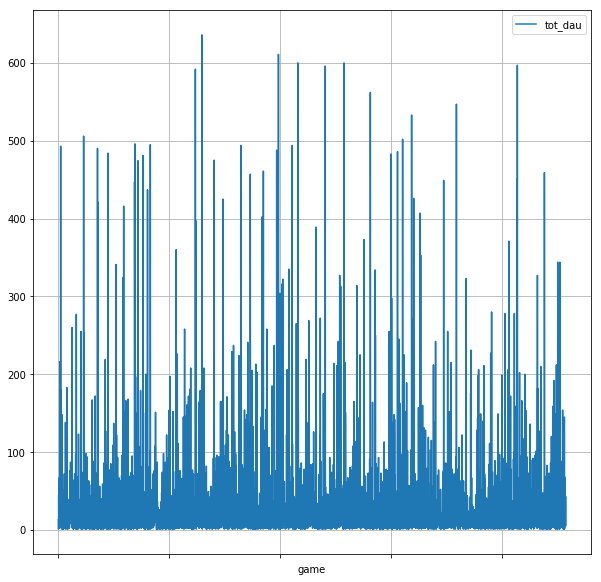

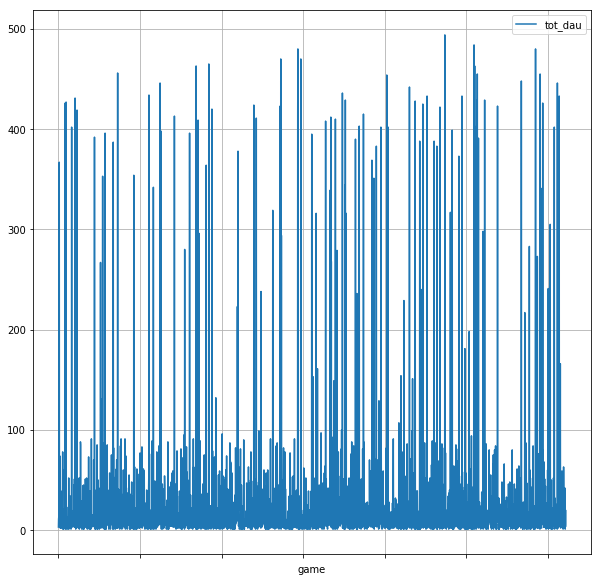

In [82]:
## for game 1
df_G1.plot(x='game', y=['tot_dau'], figsize=(10,10), grid=True)

## for game 2
df_G2.plot(x='game', y=['tot_dau'], figsize=(10,10), grid=True)

- We now check the *tot_purchase* behaviour with respect to Game1 and Game2. Surprisingly Game2 did better in tot_purchases than Game1. The below plot shows with orange lines representing Game2 and blue lnes representing Game1. 

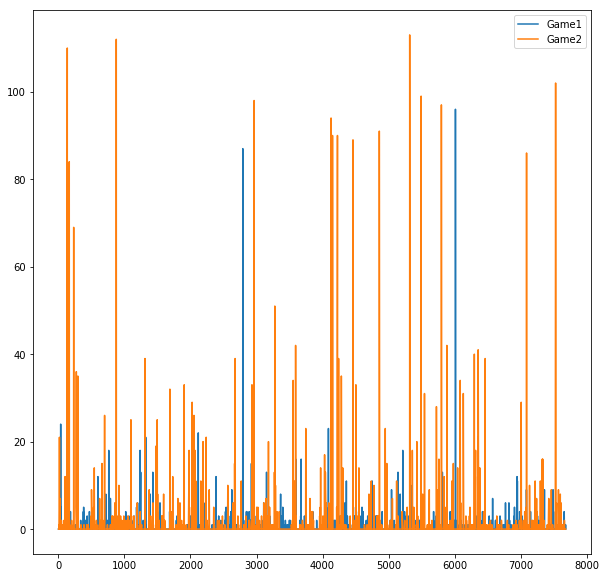

In [100]:
plt.figure(figsize=(10,10))
plt.plot(df_G1['tot_purchases'],label='Game1')
plt.plot(df_G2['tot_purchases'],label='Game2')
plt.legend()
plt.savefig('Compare4.png',dpi=600)

In [103]:
# df_plot['tot_purchases'].unique()

## Task 4

**metric_table** is the table we have created in task 3 used in this task

## Case -1

- Unit testing the sample tables, **Profile** and **DailyActivity** to check if there are any players who fall under the category of *users_entered_but_not_played, users_entered_and_played, users_played_and_not_entered*

- **Observation**: We see that 20604 users fall into the category of *users_played_and_not_entered*  - which looks buggy to me 

select
  count(
    case
      when Profile.player_id is not null
      and DailyActivity.player_id is null
        then 1
      else null
    end
  )
  as users_entered_but_not_played
  , count(
    case
      when Profile.player_id is not null
      and DailyActivity.player_id is not null
        then 1
      else null
    end
  )
  as users_entered_and_played
  , count(
    case
      when Profile.player_id is null
      and DailyActivity.player_id is not null
        then 1
      else null
    end
  )
  as users_played_and_not_entered
from
  Profile.Profile
  full outer join DailyActivity.DailyActivity using (player_id)

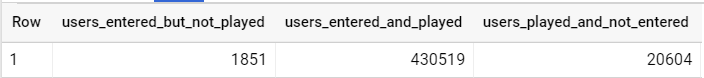

## Case-2

- Checking the distribution of days it takes to get from entry to conversion. Expected to see numbers greater than 0 which will tell that we are looking at the right time frame for conversion.

- **Observation**: This returned no rows which means there are no cases when event_date is before the registration_date

- Here **metric_table** is the final table which is obtained in task 3 

select
  date_diff(event_date  ,  registration_date , day) as days_from_entry_to_conversion
  , count(*) as num_entrants
from
  metric_table
  where date_diff(event_date  ,  registration_date , day) <0 
group by
1

## Case-3

- Checking if our query is returning the same d1_retention or d7_retention

- Here **table_join** is defined by joining two tables we have on player_id and game

- Below is the query of **table_join** :

**select t1.player_id,t1.event_date, t1.num_purchases, t1.game,
t2.country_isocode2, t2.registration_date, t2.operating_system
from DailyActivityTable t1
left join ProfileTable t2
ON t1.player_id=t2.player_id and
t1.game=t2.game**

- The dataframe df2 here represents dnu (daily new user) as it is filtered based on a particular *registration_date* *operating_system*, *country_isocode2*, *game*. We see that df2 has 52 unique (distinct) players which says that these players came back one day after install out of total 179 players (as found in distinct df3 players)

- Hence the *d1_count_percent* is (52 * 100 )/179 = 29.050279329608937. 

- We verify this result with querying the same conditions on the final table obtained from task 3. The results are shown below. 


In [56]:
import pandas as pd
projectid = "xxxxx"
dfunitTest = pd.read_gbq("select * from DailyActivity.table_join", projectid)
dfunitTest.head()

df1=dfunitTest.loc[dfunitTest['operating_system']=='iOS']
df1=df1.loc[df1['country_isocode2'] =='US']
df1=df1.loc[df1['game']=='game1']
df2=df1.loc[df1['registration_date']=='2019-02-10']
df3=df2.loc[df1['event_date']=='2019-02-11']

In [67]:
df2.head()

,player_id,event_date,num_purchases,game,country_isocode2,registration_date,operating_system
20648,484238848,2019-02-10,0,game1,US,2019-02-10,iOS
20649,484238848,2019-02-12,0,game1,US,2019-02-10,iOS
20740,484198660,2019-02-10,0,game1,US,2019-02-10,iOS
21171,484100361,2019-02-10,0,game1,US,2019-02-10,iOS
21275,484195595,2019-02-10,0,game1,US,2019-02-10,iOS


In [68]:
df3.head()

,player_id,event_date,num_purchases,game,country_isocode2,registration_date,operating_system
21292,484247564,2019-02-11,0,game1,US,2019-02-10,iOS
21361,484196624,2019-02-11,0,game1,US,2019-02-10,iOS
21387,484116753,2019-02-11,1,game1,US,2019-02-10,iOS
21900,484100891,2019-02-11,0,game1,US,2019-02-10,iOS
22516,484250407,2019-02-11,0,game1,US,2019-02-10,iOS


In [58]:
k = df3['player_id'].nunique()
k

52

In [60]:
df2['player_id'].nunique()

179

In [69]:
52*100/179

29.050279329608937

### querying the table obtained from task 3

In [64]:
queryValidation = """

WITH table0 as 

(select t1.player_id,t1.event_date, t1.num_purchases, t1.game,
t2.country_isocode2, t2.registration_date, t2.operating_system

from DailyActivityTable t1
left join ProfileTable t2
ON t1.player_id=t2.player_id and
t1.game=t2.game
)
, dnu as (

select
registration_date, country_isocode2, game, operating_system,
count(distinct player_id) as tot_dnu
from table0
group by registration_date, country_isocode2, game, operating_system
)
,dau as (

select 
event_date, country_isocode2, game, operating_system,
SUM(num_purchases) as tot_purchases, count(distinct player_id) as tot_dau 
from table0
group by event_date, country_isocode2, game, operating_system
)

, d1_retention as (

select COUNT( distinct player_id) *100/ MAX(dnu.tot_dnu)  as d1_count_percent, table0.registration_date, table0.country_isocode2, table0.game, table0.operating_system
from table0,dnu
where datediff(event_date, table0.registration_date)=1
and table0.registration_date= dnu.registration_date
and table0.country_isocode2 = dnu.country_isocode2
and table0.game  = dnu.game 
and table0.operating_system = dnu.operating_system
group by table0.registration_date, table0.country_isocode2, table0.game, table0.operating_system

)
, d7_retention as (

select COUNT( distinct player_id) * 100/ MAX(dnu.tot_dnu)  as d7_count_percent, table0.registration_date, table0.country_isocode2, table0.game, table0.operating_system
from table0,dnu
where datediff(event_date, table0.registration_date)=7
and table0.registration_date= dnu.registration_date
and table0.country_isocode2 = dnu.country_isocode2
and table0.game  = dnu.game 
and table0.operating_system = dnu.operating_system
group by table0.registration_date, table0.country_isocode2, table0.game, table0.operating_system
)
,appdau_ as (

select 
event_date, country_isocode2, game, operating_system,
SUM(num_purchases) /count(distinct player_id) as appdau 
from table0
group by event_date, country_isocode2, game, operating_system

)


, combine as(
 select dnu.registration_date,dnu.country_isocode2, dnu.game, dnu.operating_system, dnu.tot_dnu,
 dau.event_date, dau.tot_purchases, dau.tot_dau, d1_retention.d1_count_percent,d7_retention.d7_count_percent, appdau_.appdau
 from dnu
 
 inner join dau on dnu.country_isocode2=dau.country_isocode2 and
 dnu.game=dau.game and 
 dnu.operating_system= dau.operating_system and dnu.registration_date=dau.event_date 
 
 inner join d1_retention on dnu.country_isocode2=d1_retention.country_isocode2 and
 dnu.game=d1_retention.game and 
 dnu.operating_system= d1_retention.operating_system and dnu.registration_date=d1_retention.registration_date 
 
 inner join d7_retention on dnu.country_isocode2=d7_retention.country_isocode2 and
 dnu.game=d7_retention.game and 
 dnu.operating_system= d7_retention.operating_system and dnu.registration_date=d7_retention.registration_date 
 
 inner join appdau_ on dnu.country_isocode2=appdau_.country_isocode2 and
 dnu.game=appdau_.game and 
 dnu.operating_system= appdau_.operating_system and dnu.registration_date=appdau_.event_date 
 
)

select d1_count_percent from combine
where registration_date= '2019-02-10' and game = 'game1' and country_isocode2='US' and operating_system='iOS'

"""

dfValidation = spark.sql(queryValidation)
dfValidation.show()

+------------------+
|  d1_count_percent|
+------------------+
|29.050279329608937|
+------------------+



 ## Thank you 

<img src="angry-birds.png" />